In [1]:
from keras.datasets import boston_housing
import tensorflow as tf

/Users/jDB/.pyenv/versions/3.6.5/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [27]:
# 標準装備のデータセット読み込み
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [28]:
import matplotlib.pyplot as plt

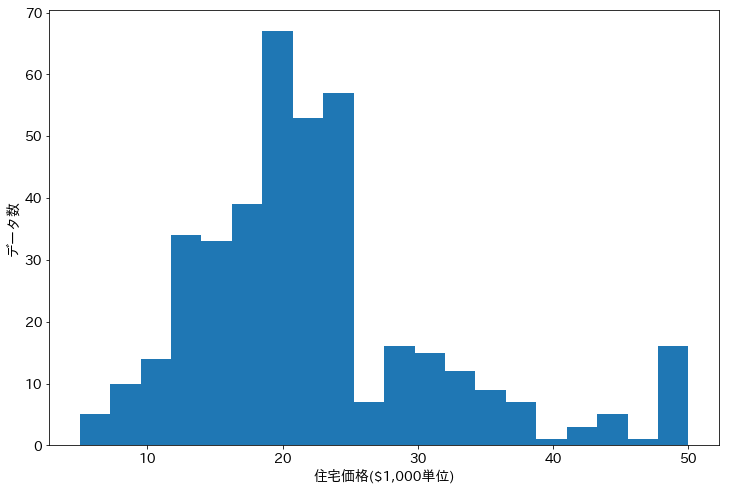

In [29]:
plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] = [12, 8]

plt.hist(y_train, bins=20)
plt.xlabel("住宅価格($1,000単位)")
plt.ylabel("データ数")
plt.show()

Text(0,0.5,'住宅価格($1,000単位)')

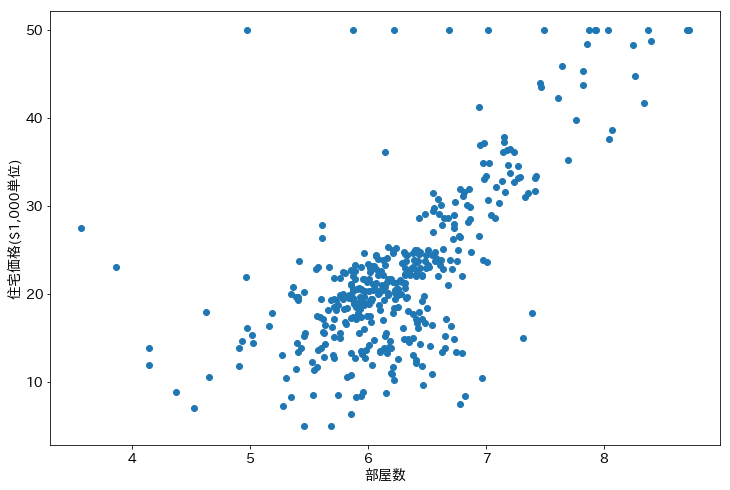

In [30]:
plt.plot(x_train[:, 5], y_train, "o")
plt.xlabel("部屋数")
plt.ylabel("住宅価格($1,000単位)")

In [31]:
def standardization(x):
    """
    データの標準化
    """
    # (データ - 平均) / 標準偏差
    return (x - x.mean(axis=0)) / x.std(axis=0)


# データの標準化
x_train = standardization(x_train)
y_train = standardization(y_train)

x_test = (x_test - x_train.mean(axis=0)) / x_train.std(axis=0)
y_test = (y_test - y_train.mean(axis=0)) / y_train.std(axis=0)

Text(0,0.5,'住宅価格(標準化)')

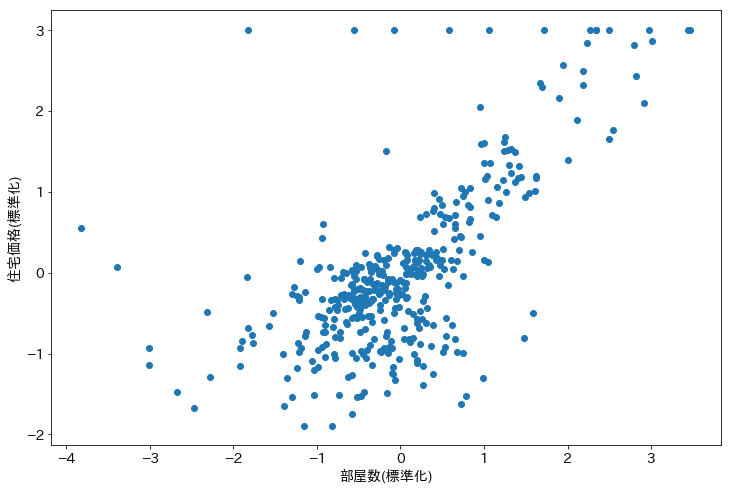

In [32]:
plt.plot(x_train[:, 5], y_train, "o")
plt.xlabel("部屋数(標準化)")
plt.ylabel("住宅価格(標準化)")

In [39]:
# 説明変数用プレースホルダー
x = tf.placeholder(tf.float32, (None, 13), name="x")
# 正解データ(住宅価格)用プレースホルダー
y = tf.placeholder(tf.float32, (None, 1), name="y")

# 重み, 13x1
w = tf.Variable(tf.random_normal((13, 1)))
# 行列積
pred = tf.matmul(x, w)

In [40]:
# 二条和誤差を損失として算出
loss = tf.reduce_mean((y - pred) ** 2)
# 最急降下法に学習率0.1を指定
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=0.1
)
train_step = optimizer.minimize(loss)

In [41]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100):
    train_loss, _ = sess.run(
        [loss, train_step],
        feed_dict={
            x: x_train,
            # y_train と y の次元を揃える
            y: y_train.reshape((-1, 1))
        }
    )
    # 10回ごとに出力
    if (step + 1) % 10 == 0 or step == 0:
        print("step: {}, loss: {}".format(step + 1, train_loss))

pred_val = sess.run(pred, feed_dict={x: x_train})

step: 1, loss: 15.748096466064453
step: 10, loss: 1.3382750749588013
step: 20, loss: 0.5604945421218872
step: 30, loss: 0.3872896432876587
step: 40, loss: 0.3224409520626068
step: 50, loss: 0.2931642532348633
step: 60, loss: 0.2786938548088074
step: 70, loss: 0.27112331986427307
step: 80, loss: 0.26697659492492676
step: 90, loss: 0.2646017074584961
step: 100, loss: 0.2631765902042389


In [48]:
print(pred_val.shape)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(pred_val[:5])

(404, 1)
(404, 13)
(404,)
(102, 13)
(102,)
[[-0.7269179 ]
 [ 1.4682254 ]
 [ 0.33736056]
 [-0.15049237]
 [-0.1746941 ]]


In [51]:
import numpy as np

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [53]:
def get_batches(x, y, batch_size):
    """
    ミニバッチサイズのリストを作って返す
    """
    # データ数
    N = len(x)
    # 0 ~ N-1 のベクトル
    indices = np.arange(N)
    # シャッフル
    np.random.shuffle(indices)

    # ランダムに並び替え
    x_shuffled = x[indices]
    y_shuffled = y[indices]

    # 0 ~ N-1 まで バッチサイズ毎に繰り返し
    for i in range(0, N, batch_size):
        x_batch = x_shuffled[i: i + batch_size]
        y_batch = y_shuffled[i: i + batch_size]
        yield x_batch, y_batch


# ミニバッチのサイズ
BATCH_SIZE = 32
step = 0
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 100エポック
for epoch in range(100):
    for x_batch, y_batch in get_batches(x_train, y_train, BATCH_SIZE):
        train_loss, _ = sess.run(
            [loss, train_step],
            feed_dict={x: x_batch, y: y_batch.reshape((-1, 1))}
        )
    # 10回ごとに出力
    if (epoch + 1) % 10 == 0 or epoch == 0:
        print("step: {}, loss: {}".format(epoch + 1, train_loss))

pred_val = sess.run(pred, feed_dict={x: x_train})

step: 1, loss: 0.9829534292221069
step: 10, loss: 0.5535956621170044
step: 20, loss: 0.33648836612701416
step: 30, loss: 0.4221213757991791
step: 40, loss: 0.1450178623199463
step: 50, loss: 0.4553695321083069
step: 60, loss: 0.2885070741176605
step: 70, loss: 0.13149769604206085
step: 80, loss: 0.4098946154117584
step: 90, loss: 0.3335030972957611
step: 100, loss: 0.2894331216812134
